My manager wants a report to understand the relationship between average daily rate(ADR) for hotels and the lead time before booking.My manager has told to make a Power Bi Dashboard for the same.

1. Need to filter out 'is_canceled'
2. create a simple linear regression  between two variables.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy
from scipy.stats import linregress

In [82]:
df=pd.read_csv('/content/hotel_bookings.csv')

In [83]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [84]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
107487,City Hotel,0,66,2017,March,10,10,1,2,2,...,No Deposit,154.0,NaN,0,Transient-Party,80.0,0,1,Check-Out,2017-03-13
24226,Resort Hotel,0,3,2016,May,21,15,1,0,1,...,Refundable,405.0,405.0,0,Transient-Party,70.0,0,0,Check-Out,2016-05-16
71041,City Hotel,1,141,2017,June,26,27,2,5,1,...,Non Refund,NaN,NaN,0,Transient,130.0,0,0,Canceled,2017-02-06
57328,City Hotel,1,111,2016,September,39,23,1,2,2,...,No Deposit,9.0,NaN,0,Transient,154.5,0,3,Canceled,2016-09-09
115961,City Hotel,0,46,2017,July,28,10,1,2,2,...,No Deposit,9.0,NaN,0,Transient,120.0,0,2,Check-Out,2017-07-13


In [85]:
df['is_canceled'].value_counts() #is_canceled Value indicating if the booking was canceled (1) or not (0)

0    75166
1    44224
Name: is_canceled, dtype: int64

is_canceled Value indicating if the booking was canceled (1) or not (0) 
Here value of 1 is less as compaire to 0, so less cancellation.

In [86]:
df1=df[df['is_canceled']!=1] # creating new dataset for not cancelled

In [87]:
df1.to_csv('filter_hotel.cv')


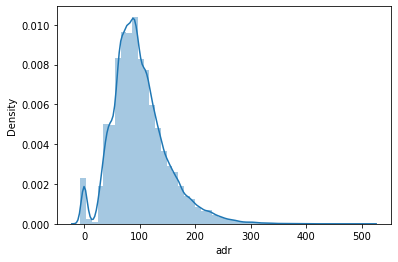

In [88]:
#univariant & bivariant analysis
sns.distplot(df1['adr'])

Above graph gives distribution of adr feature.

In [89]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

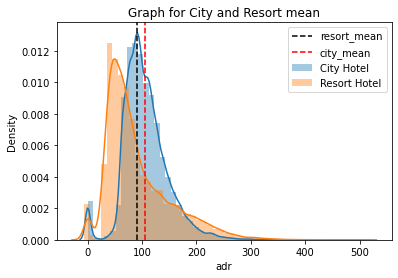

In [90]:
sns.distplot(df1[df1['hotel']=='City Hotel']['adr'],label='City Hotel')
sns.distplot(df1[df1['hotel']=='Resort Hotel']['adr'],label='Resort Hotel')
resort_mean=df1[df1['hotel']=='Resort Hotel']['adr'].mean()
city_mean=df1[df1['hotel']=='City Hotel']['adr'].mean()
plt.axvline(resort_mean,color='black',linestyle='--',label='resort_mean')
plt.axvline(city_mean,color='red',linestyle='--',label='city_mean')
plt.title(f"Graph for City and Resort mean")
#plt.figure(figsize=(20,8))
plt.legend()
plt.savefig('ADR Distribution')




Here  i have ploted distribution plot for both city hotel and resort hotel.
Added legend here , blue is cityhotel and orange is resort hotel.
axis line -red and black shown mean respectively.


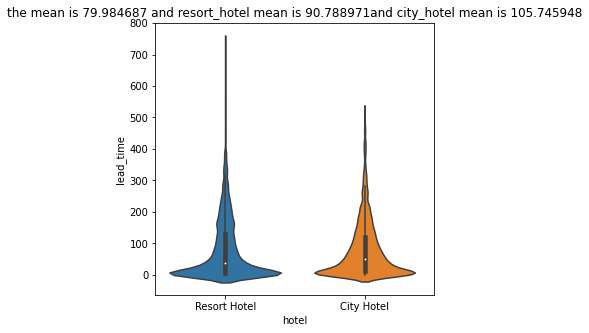

In [91]:
plt.figure(figsize=(5,5))
sns.violinplot(data=df1,y='lead_time',x='hotel')
resort_mean=df1[df1['hotel']=='Resort Hotel']['adr'].mean()
city_mean=df1[df1['hotel']=='City Hotel']['adr'].mean()
plt.title(f"the mean is {df1['lead_time'].mean():2f} and resort_hotel mean is {resort_mean:2f}and city_hotel mean is {city_mean:2f}")
plt.show()


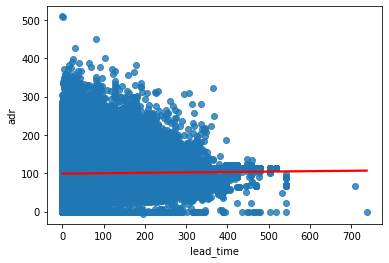

In [94]:
# Regression plot as our motive is to see the relation between ADR & lead time
sns.regplot(data=df1,y='adr',x='lead_time',line_kws={'color':'red'})

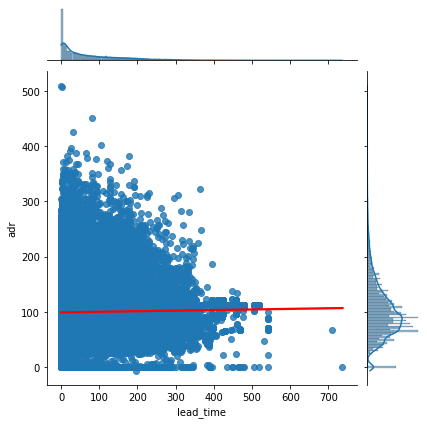

In [96]:
sns.jointplot(data=df1,y='adr',x='lead_time',kind='reg',joint_kws={'line_kws':{'color':'red'}})

Joint plot is nth but its shows you the density  and reg.(right side curve)

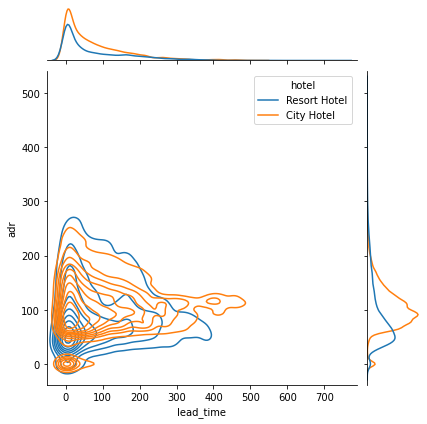

In [62]:
sns.jointplot(data=df1,y='adr',x='lead_time',kind='kde',hue='hotel')

Above is joint plot for hotel -Resort & city hotel

In [65]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Now for regression -  i am using scipy .

In [74]:
#Linear Regression
linregress(df1['lead_time'],df1['adr'])


LinregressResult(slope=0.010616692844721482, intercept=99.13852011633129, rvalue=0.019657775835291463, pvalue=7.050113240927329e-08, stderr=0.001969545437738415, intercept_stderr=0.23878211525758888)

In [79]:
#Linear Regression
slop=linregress(df1['lead_time'],df1['adr'])[0]
intercept=linregress(df1['lead_time'],df1['adr'])[1]
r2=linregress(df1['lead_time'],df1['adr'])[2]
regression_table=pd.DataFrame({'Name':['slop','intercept','r2'],'values':[slop,intercept,r2]})
regression_table


,Name,values
0,slop,0.010617
1,intercept,99.138520
2,r2,0.019658
